# Portfolio Optimization Project

**Objective**

* Conducted portfolio optimization to minimize risk (variance) while maximizing return using mean-variance optimization techniques.

**Methodology**

* Downloaded historical stock data using yfinance.
* Calculated daily returns and covariance matrix for assets (AAPL, AMZN, GOOG, NVDA, TSLA).
* Implemented an optimization model using scipy.optimize.minimize to allocate portfolio weights.
* Constraints: Ensured the sum of portfolio weights equals 1, with bounds between 0 and 1.

**Tools/Technologies**

* Python, Pandas, Numpy, Scipy, Yahoo Finance API

In [2]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'TSLA', 'NVDA', 'AMZN', 'GOOG']
# Downloading historical stock data.
data = yf.download(tickers, start = '2023-01-01', end = '2024-01-01')['Adj Close']

print(data)

[*********************100%***********************]  5 of 5 completed

Ticker            AAPL        AMZN        GOOG       NVDA        TSLA
Date                                                                 
2023-01-03  123.768456   85.820000   89.378853  14.304595  108.099998
2023-01-04  125.045044   85.139999   88.392395  14.738280  113.639999
2023-01-05  123.718979   83.120003   86.459335  14.254631  110.339996
2023-01-06  128.271118   86.080002   87.844376  14.848201  113.059998
2023-01-09  128.795593   87.360001   88.482086  15.616642  119.769997
...                ...         ...         ...        ...         ...
2023-12-22  192.656174  153.419998  142.209030  48.816162  252.539993
2023-12-26  192.108871  153.410004  142.308670  49.265030  256.609985
2023-12-27  192.208359  153.339996  140.933624  49.402988  261.440002
2023-12-28  192.636292  153.380005  140.774185  49.507965  253.179993
2023-12-29  191.591385  151.940002  140.425430  49.507965  248.479996

[250 rows x 5 columns]


In [3]:
daily_returns = data.pct_change().dropna() # calculating daily returns

print(daily_returns)


Ticker          AAPL      AMZN      GOOG      NVDA      TSLA
Date                                                        
2023-01-04  0.010314 -0.007924 -0.011037  0.030318  0.051249
2023-01-05 -0.010605 -0.023726 -0.021869 -0.032816 -0.029039
2023-01-06  0.036794  0.035611  0.016020  0.041640  0.024651
2023-01-09  0.004089  0.014870  0.007260  0.051753  0.059349
2023-01-10  0.004456  0.028732  0.004955  0.017981 -0.007681
...              ...       ...       ...       ...       ...
2023-12-22 -0.005548 -0.002730  0.006488 -0.003266 -0.007701
2023-12-26 -0.002841 -0.000065  0.000701  0.009195  0.016116
2023-12-27  0.000518 -0.000456 -0.009662  0.002800  0.018822
2023-12-28  0.002226  0.000261 -0.001131  0.002125 -0.031594
2023-12-29 -0.005424 -0.009388 -0.002477  0.000000 -0.018564

[249 rows x 5 columns]


In [4]:
# mean returns and covariance

mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

print('Mean Returns: ')
print(mean_returns)
print('\nCovariance Matrix: ')
print(cov_matrix)

Mean Returns: 
Ticker
AAPL    0.001835
AMZN    0.002511
GOOG    0.002002
NVDA    0.005442
TSLA    0.003893
dtype: float64

Covariance Matrix: 
Ticker      AAPL      AMZN      GOOG      NVDA      TSLA
Ticker                                                  
AAPL    0.000158  0.000116  0.000130  0.000171  0.000185
AMZN    0.000116  0.000433  0.000246  0.000242  0.000257
GOOG    0.000130  0.000246  0.000372  0.000245  0.000218
NVDA    0.000171  0.000242  0.000245  0.000932  0.000413
TSLA    0.000185  0.000257  0.000218  0.000413  0.001100


The portfolio return formula is:

$$
R_p = \sum_{i=1}^n w_i \cdot r_i
$$

The portfolio variance formula is:

$$
\sigma_p^2 = \sum_{i=1}^n \sum_{j=1}^n w_i \cdot w_j \cdot \text{Cov}(r_i, r_j)
$$

The optimized portfolio variance, denoted by $ \sigma_p^2 $, is minimized to achieve the desired balance of risk and return.
 

In [6]:
# Goal is to maximise portfolio return while minimising risk
import numpy as np
from scipy.optimize import minimize

num_assets = len(mean_returns) # number of assets

weights = np.random.random(num_assets) # weights represent the proportion of the portfolio allocated to each asset.
weights /= np.sum(weights)

def portfolio_return(weights):
    return np.sum(mean_returns * weights)

def portfolio_variance(weights):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

#optimization function
def objective_function(weights):
    return portfolio_variance(weights)

# constraints= weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

#bounds for weights (0-1)
bounds = tuple((0, 1) for _ in range(num_assets))

# minimize variance (risk)
result = minimize(objective_function, weights, method = 'SLSQP', bounds = bounds, constraints = constraints)

optimized_weights = result.x
print('Optimized Weights: ') #the proportion of each asset in the portfolio that minimizes the risk (variance).
print(optimized_weights)

Optimized Weights: 
[0.22412359 0.17605608 0.26811127 0.12757097 0.2041381 ]


In [7]:
# Portfolio returns and risk
optimized_return = portfolio_return(optimized_weights)
optimized_risk = np.sqrt(portfolio_variance(optimized_weights))

print(f'Optimized Portfolio Retutn: {optimized_return:.2%}')
print(f'Optimized Portfolio Risk: {optimized_risk:.2%}')


Optimized Portfolio Retutn: 0.29%
Optimized Portfolio Risk: 1.66%


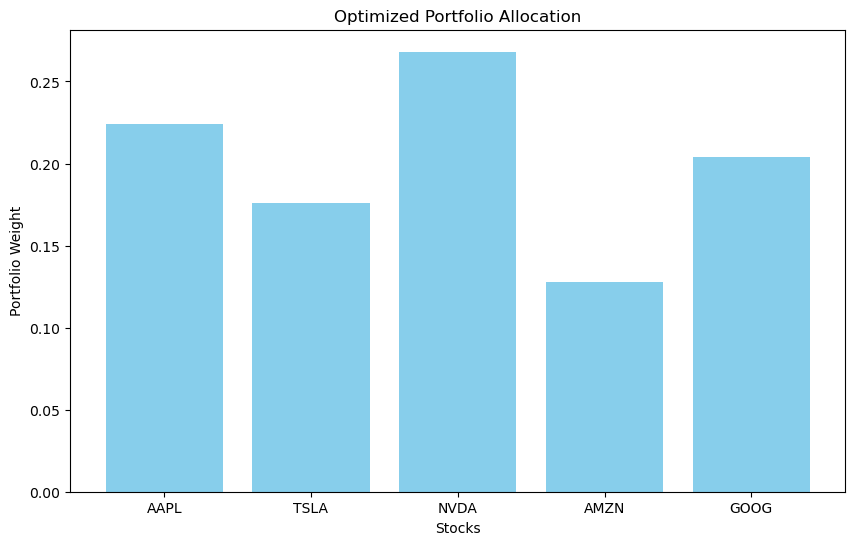

In [19]:
import matplotlib.pyplot as plt

# plotting optimized weights
plt.figure(figsize = (10,6))
plt.bar(tickers, optimized_weights, color = 'skyblue')
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weight')
plt.title('Optimized Portfolio Allocation')
plt.show()

## Conclusion
The optimized portfolio achieved a balance between risk and return by diversifying investments across multiple assets. 
Key Insights:
- Higher weights were assigned to less volatile assets.
- The optimization process reduced overall portfolio risk significantly.